# Dividir el dataset en conjunto de entrenamiento y testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./datasets/ads/Advertising.csv')

In [4]:
a = np.random.randn(len(data))

(array([ 5.,  6., 21., 34., 50., 34., 32., 12.,  4.,  2.]),
 array([-2.88405385, -2.28147405, -1.67889425, -1.07631445, -0.47373465,
         0.12884515,  0.73142494,  1.33400474,  1.93658454,  2.53916434,
         3.14174414]),
 <BarContainer object of 10 artists>)

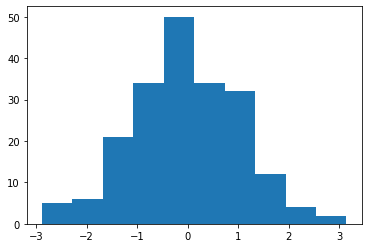

In [5]:
plt.hist(a)

In [7]:
check = (a<0.8)
training = data[check]
testing = data[~check]


In [8]:
len(training)

155

In [9]:
len(testing)

45

In [10]:
import statsmodels.formula.api as smf

In [11]:
lm = smf.ols(formula='Sales~TV+Radio', data=training).fit()

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     629.3
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           2.91e-74
Time:                        11:17:57   Log-Likelihood:                -303.42
No. Observations:                 155   AIC:                             612.8
Df Residuals:                     152   BIC:                             622.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9026      0.340      8.542      0.000       2.231       3.574
TV             0.0454      0.002     27.795      0.000       0.042       0.049
Radio          0.1914      0.009     20.658      0.000       0.173       0.210
==============================================================================
Omnibus:                       52.998   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.197
Skew:                          -1.396   Prob(JB):                     3.60e-31
Kurtosis:                       6.730   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## $Sales = 2.9026 + 0.0454*TV + 0.1914*Radio$

# Validación del modelo con el conjunto de testing

In [14]:
sales_pred = lm.predict(testing)
sales_pred

3      17.682547
5      12.657073
10      7.012337
11     17.239225
16     12.984715
17     23.251912
21     14.651802
22      6.544957
30     21.610910
33     18.783409
36     23.397810
39     20.464998
48     16.236954
50     12.562739
68     18.939245
69     21.143455
72     10.435117
79      9.640423
82     10.205178
83     14.524032
92     19.193698
95     16.361405
97     15.312716
101    23.300967
103    14.721519
107     7.062330
109    19.641227
110    14.718755
118    15.669589
127     6.542041
132     8.489999
136    11.529084
138     9.811293
139    19.695860
143     8.740294
146    15.195414
150    18.301072
162    14.916472
163    17.365780
164    11.034704
179    12.331457
187    17.067875
191     8.395919
194    16.509863
195     5.344311
dtype: float64

In [15]:
SSD = sum((testing['Sales'] - sales_pred)**2)
SSD

102.44156238571982

In [17]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.5617569653142627

In [18]:
sales_mean = np.mean(testing['Sales'])
error = RSE/sales_mean
error

0.10711638993924984